# **Fraud detection (ML Model)**



## Importing  libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Importing dataset
{The Dataset was taken from kaggle}

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/input pipeline/transactions_train.csv')


## Exploratory Data Analysis

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1792716,162,CASH_IN,36918.13,C370520752,1475073.68,1511991.81,C48875939,2605780.65,2568862.52,0
4102098,301,CASH_OUT,193800.97,C1109301901,0.00,0.00,C1664492254,2202424.27,2396225.24,0
1978505,179,PAYMENT,22985.10,C1702965988,42126.00,19140.90,M719295336,0.00,0.00,0
1338188,137,PAYMENT,11885.16,C1362223100,0.00,0.00,M485761711,0.00,0.00,0
493127,20,CASH_IN,148224.58,C1583772456,405609.00,553833.58,C368608264,2168162.07,2019937.49,0


In [ ]:
df.shape

(6351193, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06
mean,2.425553e+02,1.798155e+05,8.347957e+05,8.561696e+05,1.101043e+06,1.225372e+06,1.215047e-03
std,1.410676e+02,6.036310e+05,2.889959e+06,2.926073e+06,3.398924e+06,3.674293e+06,3.483635e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.338829e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,7.486483e+04,1.415300e+04,0.000000e+00,1.330865e+05,2.149190e+05,0.000000e+00
75%,3.340000e+02,2.087152e+05,1.073460e+05,1.443651e+05,9.438661e+05,1.112791e+06,0.000000e+00
max,6.990000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

Scaling of the features

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['step', 'amount', 'oldbalanceOrig','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.71233689 -0.28158911 -0.22998932 -0.23781815 -0.32393864 -0.33349877]
 [-1.71233689 -0.29480142 -0.28150805 -0.28597541 -0.32393864 -0.33349877]
 [-1.71233689 -0.29759001 -0.28879812 -0.29260023 -0.32393864 -0.33349877]
 ...
 [ 3.23564462  4.28007023  0.66734605 -0.29260023 -0.32393864 -0.33349877]
 [ 3.23564462  4.28007023  0.66734605 -0.29260023 -0.22404955  0.5109941 ]
 [ 3.23564462 -0.29693198 -0.28520153 -0.28918378 -0.28655262 -0.29875727]]


## PRE PROCESSING


Outlier detection and removal

In [ ]:
df_columns=['step', 'amount', 'oldbalanceOrig','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

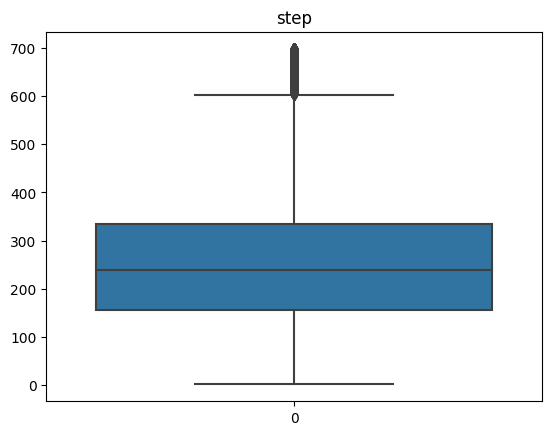

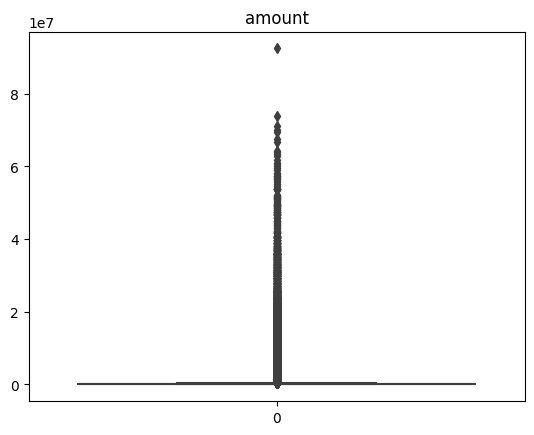

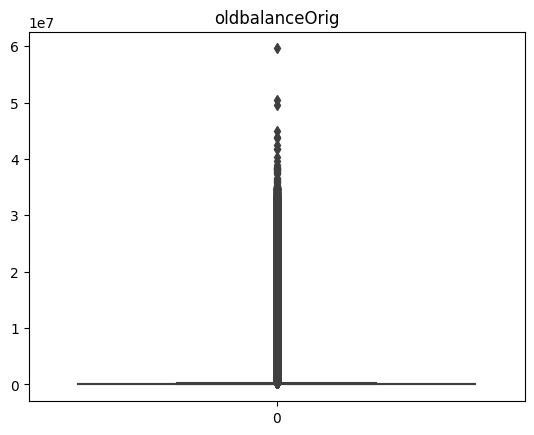

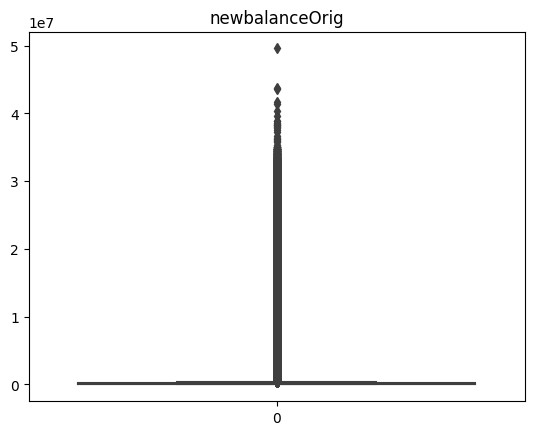

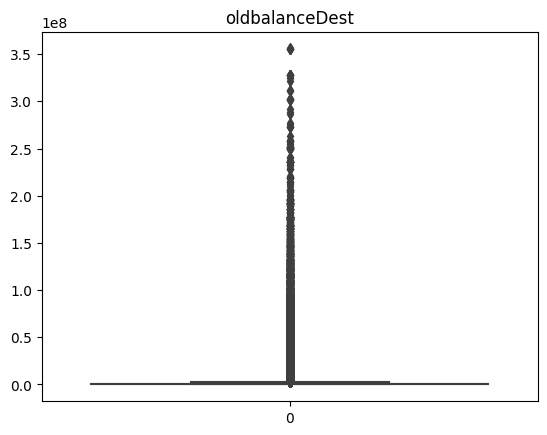

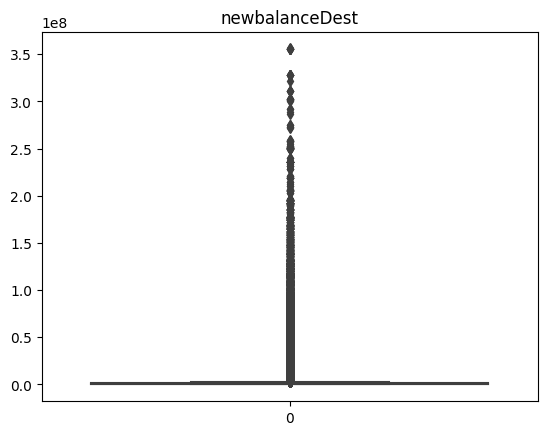

In [ ]:
for i in df_columns:
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()


In [ ]:
#print old shape
print("Old Shape: ", df.shape)

Old Shape:  (6351193, 10)


In [ ]:
''' Detection and Removal '''
# IQR
Q1_list=[]
Q3_list=[]
IQR_list=[]
for i in df_columns:

  Q1 = np.percentile(df[i], 25,
          interpolation = 'midpoint')

  Q3 = np.percentile(df[i], 75,
          interpolation = 'midpoint')
  IQR = Q3 - Q1
  Q1_list.append(Q1)
  Q3_list.append(Q3)
  IQR_list.append(IQR)


print(Q1_list)
print(Q3_list)
print(IQR_list)

<ipython-input-18-3bfca81e7eae>:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[i], 25,
<ipython-input-18-3bfca81e7eae>:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[i], 75,


[155.0, 13388.29, 0.0, 0.0, 0.0, 0.0]
[334.0, 208715.19, 107346.0, 144365.15, 943866.12, 1112791.08]
[179.0, 195326.9, 107346.0, 144365.15, 943866.12, 1112791.08]


In [ ]:
# Create arrays of Boolean values indicating the outlier rows
for i in range(0,len(df_columns)):
  lower = Q1_list[i] - 1.5*IQR_list[i]
  upper = Q3_list[i] + 1.5*IQR_list[i]
for i in df_columns:
  upper_array = np.where(df[i]>=upper)[0]
  lower_array = np.where(df[i]<=lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 

In [ ]:
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (5614276, 10)


Check for imbalance in dataset

In [ ]:
fraud=df['isFraud'].value_counts()[1]
nonfraud=df['isFraud'].value_counts()[0]
print(f"Fraudlents: {fraud}, Non-Fraude=lents: {nonfraud}")
print(f"Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)")

Fraudlents: 6688, Non-Fraude=lents: 5607588
Ratio of fraud to non-fraud: 6688/5607588 (0.119%)


<Axes: ylabel='isFraud'>

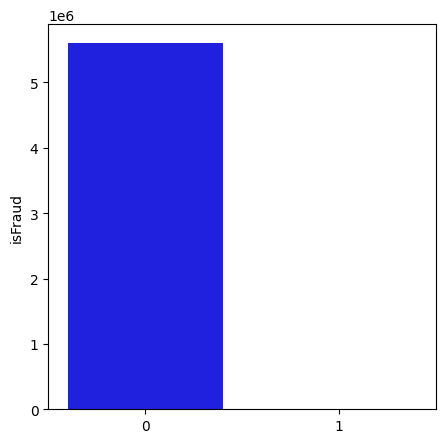

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['isFraud'].value_counts().index,y=df['isFraud'].value_counts(),color='blue')

Imbalance was detected in the dataste

## Modeling

In [ ]:
# defineing the Features and label
X=df[['step','amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=df['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3929993, 6)
Number transactions y_train dataset:  (3929993,)
Number transactions X_test dataset:  (1684283, 6)
Number transactions y_test dataset:  (1684283,)


In [ ]:
# Removing the imbalance from the training dataset
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 4694
Before OverSampling, counts of label '0': 3925299 

After OverSampling, the shape of train_X: (7850598, 6)
After OverSampling, the shape of train_y: (7850598,) 

After OverSampling, counts of label '1': 3925299
After OverSampling, counts of label '0': 3925299


In [ ]:
X_train_res

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,33,6915.500000,14159.700000,7244.20,0.00,0.000000
1,394,7409.660000,0.000000,0.00,0.00,0.000000
2,323,10097.420000,10945.000000,847.58,0.00,0.000000
3,35,4728.520000,0.000000,0.00,0.00,0.000000
4,235,145750.590000,12494.000000,0.00,561126.87,706877.460000
...,...,...,...,...,...,...
7850593,293,507224.078521,507224.078521,0.00,0.00,507224.078521
7850594,403,143501.524266,143501.524266,0.00,0.00,0.000000
7850595,465,227338.591833,227338.591833,0.00,0.00,0.000000
7850596,132,28949.014441,28949.014441,0.00,0.00,0.000000


In [ ]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

## Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1682289
           1       0.02      0.89      0.03      1994

    accuracy                           0.93   1684283
   macro avg       0.51      0.91      0.50   1684283
weighted avg       1.00      0.93      0.96   1684283



## Confusion Matrix

In [ ]:
# confusion matrix

# Evaluate Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
print (cm)

[[1568186  114103]
 [    212    1782]]


In [ ]:
print(f1_score(y_test, predictions))

0.030234392894408674


In [ ]:
print(accuracy_score(y_test, predictions))

0.9321283893502458


In [ ]:
print(mean_squared_error(y_test, predictions))

0.06787161064975422


In [ ]:
print(recall_score(y_test, predictions))

0.8936810431293881


In [ ]:
# correlation
correlation=df.corr()

<ipython-input-35-912f262454ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

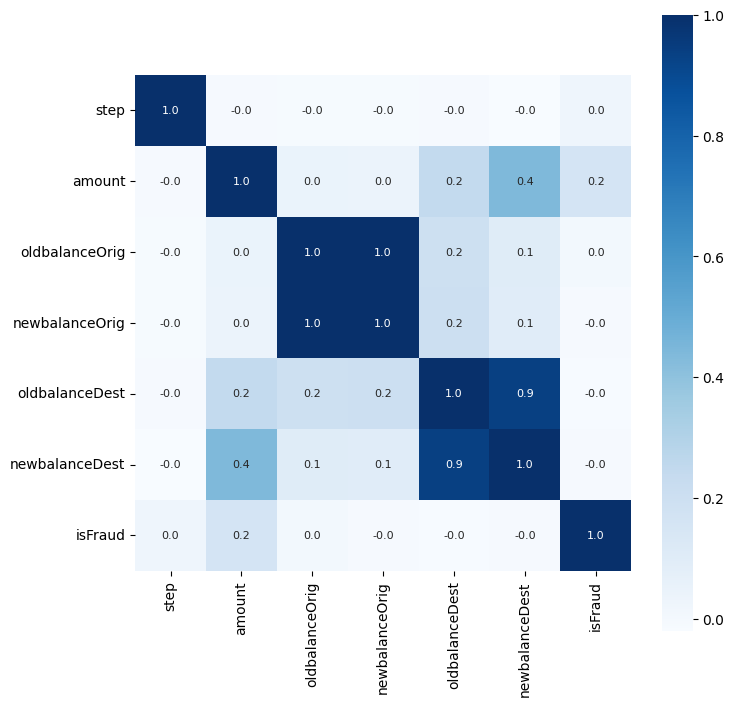

In [ ]:
# heatmap for correlation values
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')